In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

**Downloading input files**

In [2]:
df_train = pd.read_csv('/kaggle/input/testdataset/application_train.csv')
df_test = pd.read_csv('/kaggle/input/testdataset/application_test.csv')
df_submission = pd.read_csv('/kaggle/input/submission/sample_submission.csv')

**Watching the features**

In [3]:
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [5]:
df_submission.head()

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [6]:
print(df_train.shape)
df_train.head()

(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [7]:
df_train.sample(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
286244      431519       0         Cash loans           M            N   
106783      223891       0         Cash loans           M            Y   
28381       132987       0         Cash loans           F            Y   
249152      388295       0         Cash loans           F            N   
117152      235857       0         Cash loans           F            N   
96810       212384       0         Cash loans           F            N   
8713        110141       0         Cash loans           F            N   
200960      332947       1         Cash loans           F            N   
228745      364949       0         Cash loans           F            N   
254296      394260       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
286244               Y             0          112500.0    306000.0   
106783               N             0          135000.0    450000.0   
28381                Y             0           90000.0    436032.0   
249152               N             0          180000.0    755190.0   
117152               Y             0          112500.0    163008.0   
96810                Y             0          189000.0    904500.0   
8713                 N             0          157500.0    454500.0   
200960               Y             0          211500.0    582804.0   
228745               Y             0          360000.0    900000.0   
254296               Y             0          112500.0   1288350.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
286244      24664.5  ...                 0                0                0   
106783      36081.0  ...                 0                0                0   
28381       22923.0  ...                 0                0                0   
249152      30757.5  ...                 0                0                0   
117152       9355.5  ...                 0                0                0   
96810       38452.5  ...                 0                0                0   
8713        20020.5  ...                 0                0                0   
200960      31747.5  ...                 0                0                0   
228745      38263.5  ...                 0                0                0   
254296      37800.0  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
286244                0                        0.0                       0.0   
106783                0                        0.0                       0.0   
28381                 0                        0.0                       0.0   
249152                0                        0.0                       0.0   
117152                0                        0.0                       0.0   
96810                 0                        0.0                       0.0   
8713                  0                        0.0                       0.0   
200960                0                        0.0                       0.0   
228745                0                        0.0                       0.0   
254296                0                        NaN                       NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
286244                         0.0                        0.0   
106783                         0.0                        0.0   
28381                          0.0                        0.0   
249152                         1.0                        0.0   
117152                         0.0                        0.0   
96810                          0.0                        0.0   
8713                           0.0                        0.0   
200960                         0.0                        1.0   
228745                         0.0                        0.0   
254296    

**Filter categorical features and add them in another dataframe**

In [8]:
columns_list = list(df_train.columns)
i = 0
category_features = set()
for column_type in df_train.dtypes:
    if column_type == 'object' or 'FLAG' in columns_list[i] or 'LIVE_' in columns_list[i] or 'REG_' in columns_list[i]:
        category_features.add(columns_list[i])
        df_train[columns_list[i]] = df_train[columns_list[i]].astype('category')
    i = i + 1
print(category_features)
len(category_features)

{'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_14', 'ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_MOBIL', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11', 'FLAG_PHONE', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_15', 'NAME_CONTRACT_TYPE', 'HOUSETYPE_MODE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'LIVE_REGION_NOT_WORK_REGION', 'OCCUPATION_TYPE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_17', 'CODE_GENDER', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_21', 'NAME_FAMILY_STATUS', 'FLAG_DOCUMENT_9', 'NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_8', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_13', 'FLAG_OWN_CAR', 'WALLSMATERIAL_MODE', 'FONDKAPREMONT_MODE', 'NAME_INCOME_TYPE', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_10', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_EMP_PHONE'}


48

In [9]:
df_train.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY      float64
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
Length: 122, dtype: object

In [10]:
cat_df_train = df_train.select_dtypes(include = ['category']).copy()
cat_df_train.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE FLAG_MOBIL  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13  \
0  House / apartment          1  ...                0                0   
1  House / apartment          1  ...                0                0   
2  House / apartment          1  ...                0                0   
3  House / apartment          1  ...                0                0   
4  House / apartment          1  ...                0                0   

  FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  
0                0                0                0                0  
1                0                0                0                0  
2                0                0                0                0  
3                0                0                0                0  
4                0                0                0                0  

[5 rows x 48 columns]

**Handling missing values**

In [11]:
cat_df_train.isnull().sum()

NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                 96391
WEEKDAY_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                   0
FONDKAPREMONT_MODE             210295
HOUSETYPE_MODE                 154297
WALLSMATERIA

**Function that fills missing values with mode of the feature**

In [12]:
def fill_with_mode(df):
    i = 0
    df_train_features_list = list(df)
    for number in df.isnull().sum():
        if number > 0:
            df[df_train_features_list[i]] = df[df_train_features_list[i]].fillna(df[df_train_features_list[i]].value_counts().index[0])
        i = i + 1

In [13]:
fill_with_mode(cat_df_train)
print(cat_df_train.isnull().sum())

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
FONDKAPREMONT_MODE             0
HOUSETYPE_MODE                 0
WALLSMATERIAL_MODE             0
EMERGENCYSTATE_MODE            0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUM

**Function that encodes categorical features using label encoding**

In [14]:
def label_encoding(df, help_df=None, flag_help = False):
    if flag_help:
        cat = df.copy()
        for feature in help_df:
            labels = cat[feature].astype('category').cat.categories.tolist()
            replace_map_comp = {feature : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
            cat.replace(replace_map_comp, inplace=True)
        return cat
    else:
        cat = df.copy()
        for feature in cat:
            labels = cat[feature].astype('category').cat.categories.tolist()
            replace_map_comp = {feature : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
            cat.replace(replace_map_comp, inplace=True)
        return cat

In [15]:
cat_df_train_replace = label_encoding(cat_df_train)

In [16]:
cat_df_train_replace.head()

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   1            2             1                2   
1                   1            1             1                1   
2                   2            2             2                2   
3                   1            1             1                2   
4                   1            2             1                2   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                7                 8                    5                   4   
1                2                 5                    2                   2   
2                7                 8                    5                   4   
3                7                 8                    5                   1   
4                7                 8                    5                   4   

   NAME_HOUSING_TYPE  FLAG_MOBIL  ...  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                  2           2  ...                 1                 1   
1                  2           2  ...                 1                 1   
2                  2           2  ...                 1                 1   
3                  2           2  ...                 1                 1   
4                  2           2  ...                 1                 1   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 1                 1                 1                 1   
1                 1                 1                 1                 1   
2                 1                 1                 1                 1   
3                 1                 1                 1                 1   
4                 1                 1                 1                 1   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 1                 1                 1                 1  
1                 1                 1                 1                 1  
2                 1                 1                 1                 1  
3                 1                 1                 1                 1  
4                 1                 1                 1                 1  

[5 rows x 48 columns]

**Building histograms with categorical features**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


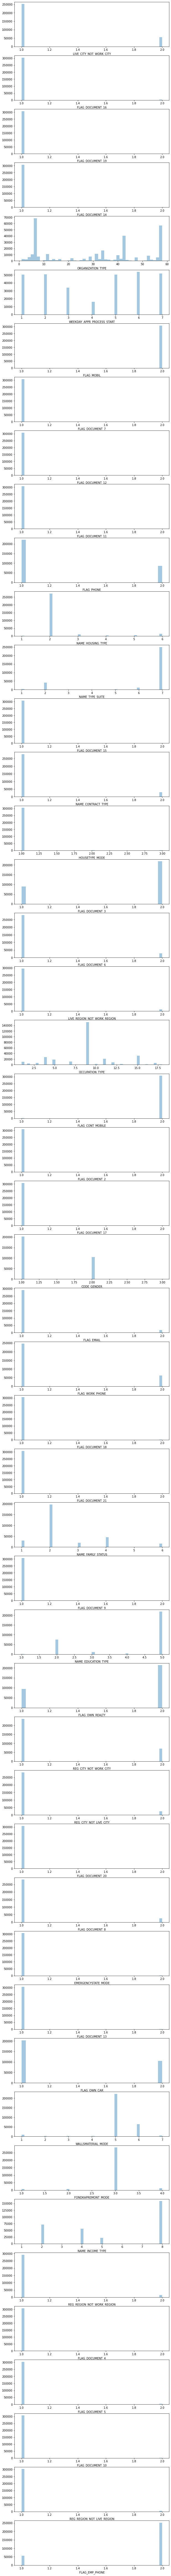

In [17]:
fig, axes = plt.subplots(nrows=len(category_features), ncols=1)
fig.set_size_inches(10, 170)
for i, col in enumerate(category_features):
    sns.distplot(cat_df_train_replace[col], kde=False, ax=axes[i])
plt.show()

**Dropping unuseful feature id**

In [18]:
df_train.drop('SK_ID_CURR',
  axis='columns', inplace=True)
numerical_features = df_train.select_dtypes(include = ['float64', 'int64']).columns

**Drawing numerical features distribution**

array([[<AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT_W_CITY'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'EXT_SOURCE_1'}>,
        <

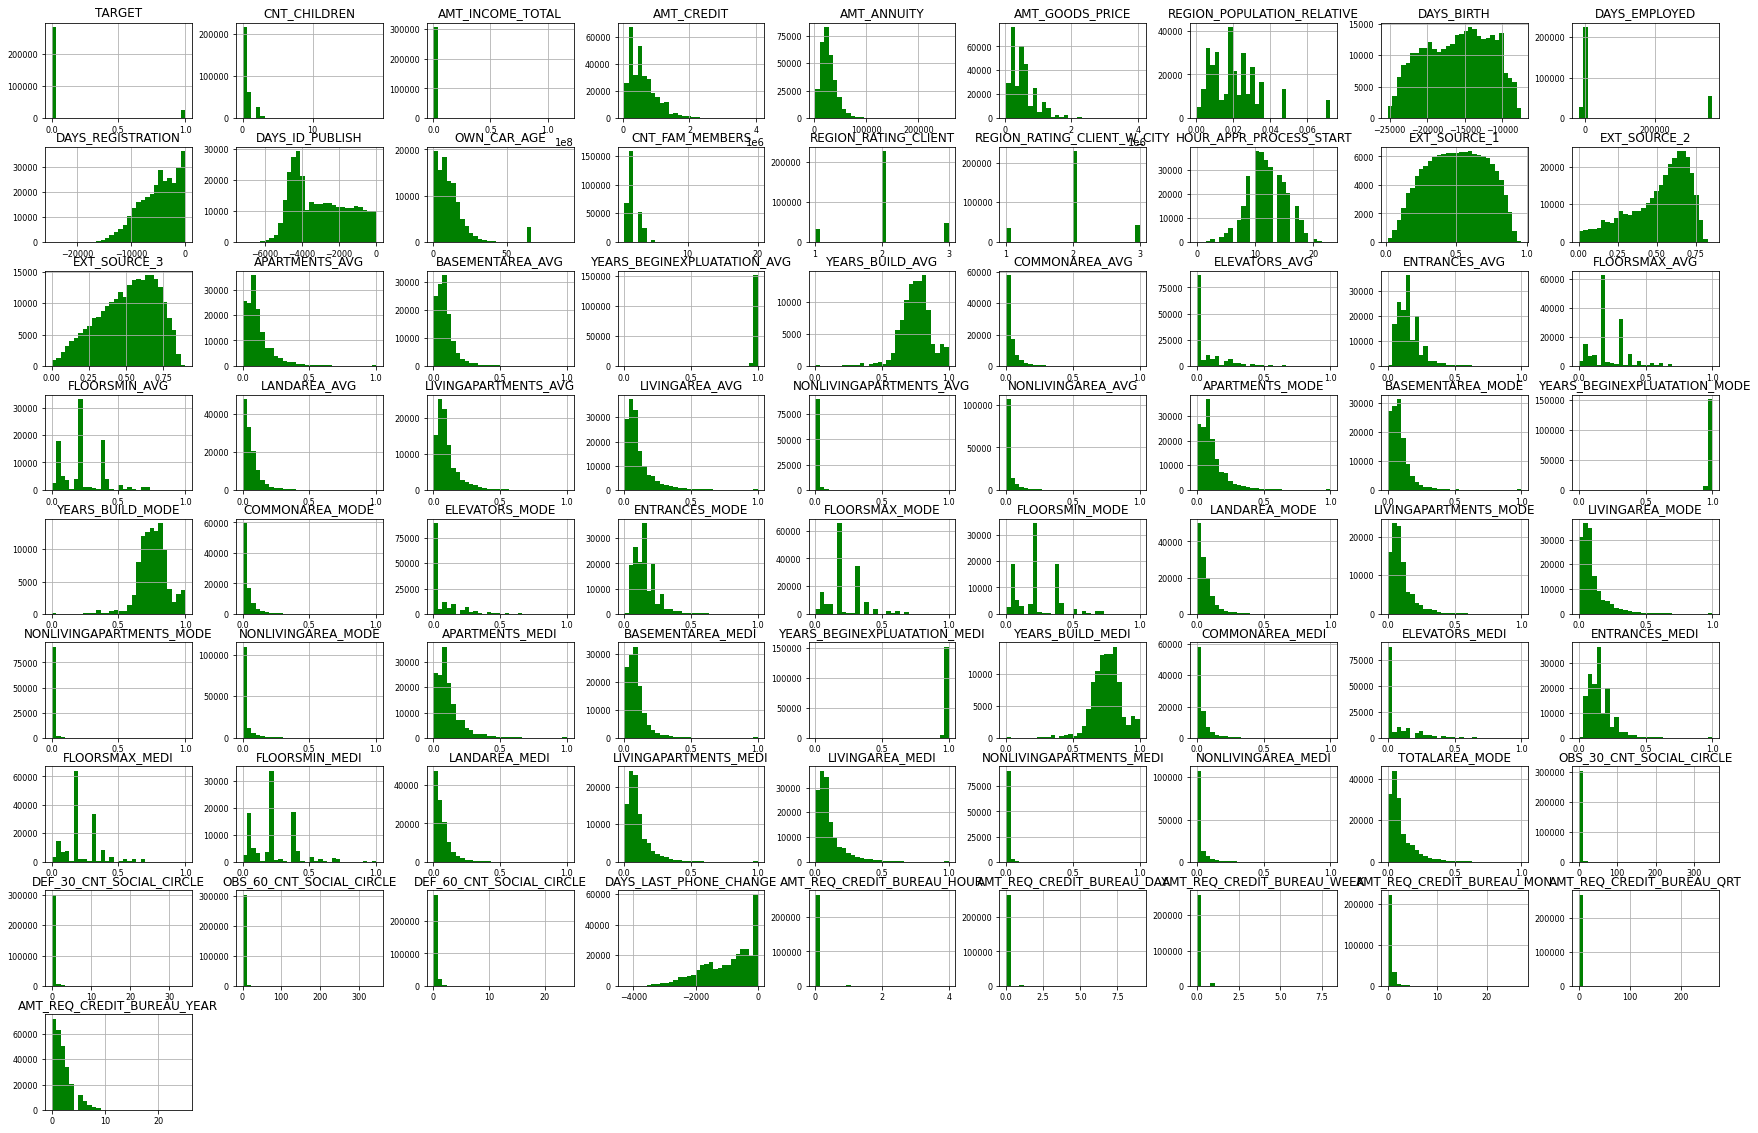

In [19]:
df_train[numerical_features].hist(figsize=(30, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

In [20]:
df_train_numerical = df_train[numerical_features].copy()
fill_with_mode(df_train_numerical)
print(df_train_numerical.isnull().sum())

TARGET                        0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64


In [21]:
df_train_numerical.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0       1             0          202500.0    406597.5      24700.5   
1       0             0          270000.0   1293502.5      35698.5   
2       0             0           67500.0    135000.0       6750.0   
3       0             0          135000.0    312682.5      29686.5   
4       0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461           -637   
1        1129500.0                    0.003541      -16765          -1188   
2         135000.0                    0.010032      -19046           -225   
3         297000.0                    0.008019      -19005          -3039   
4         513000.0                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  ...  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0            -3648.0  ...                       2.0                       2.0   
1            -1186.0  ...                       0.0                       1.0   
2            -4260.0  ...                       0.0                       0.0   
3            -9833.0  ...                       0.0                       2.0   
4            -4311.0  ...                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                 -1134.0   
1                       0.0                  -828.0   
2                       0.0                  -815.0   
3                       0.0                  -617.0   
4                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 73 columns]

**Drawing boxplots for outliers handling**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

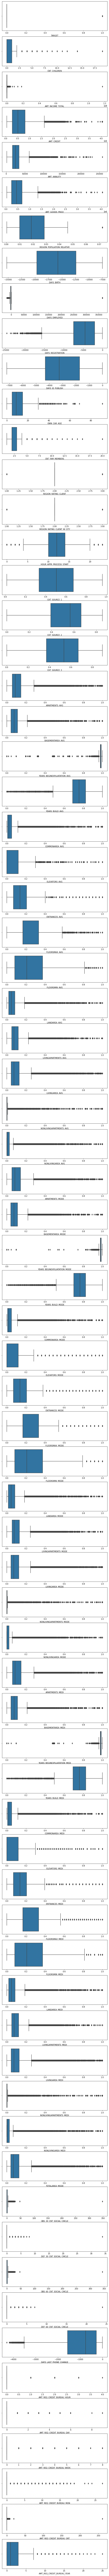

In [22]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10, 250)
for i, col in enumerate(numerical_features):
    sns.boxplot(df_train[col], ax=axes[i])
plt.show()

**Function that builds a correlation matrix with a dataframe**

In [23]:
def build_correlation_matrix(df):
    corrMatt = df.corr()
    mask = np.array(corrMatt)
    mask[np.tril_indices_from(mask)] = False
    fig,ax= plt.subplots()
    fig.set_size_inches(90,90)
    sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)
    return corrMatt
    

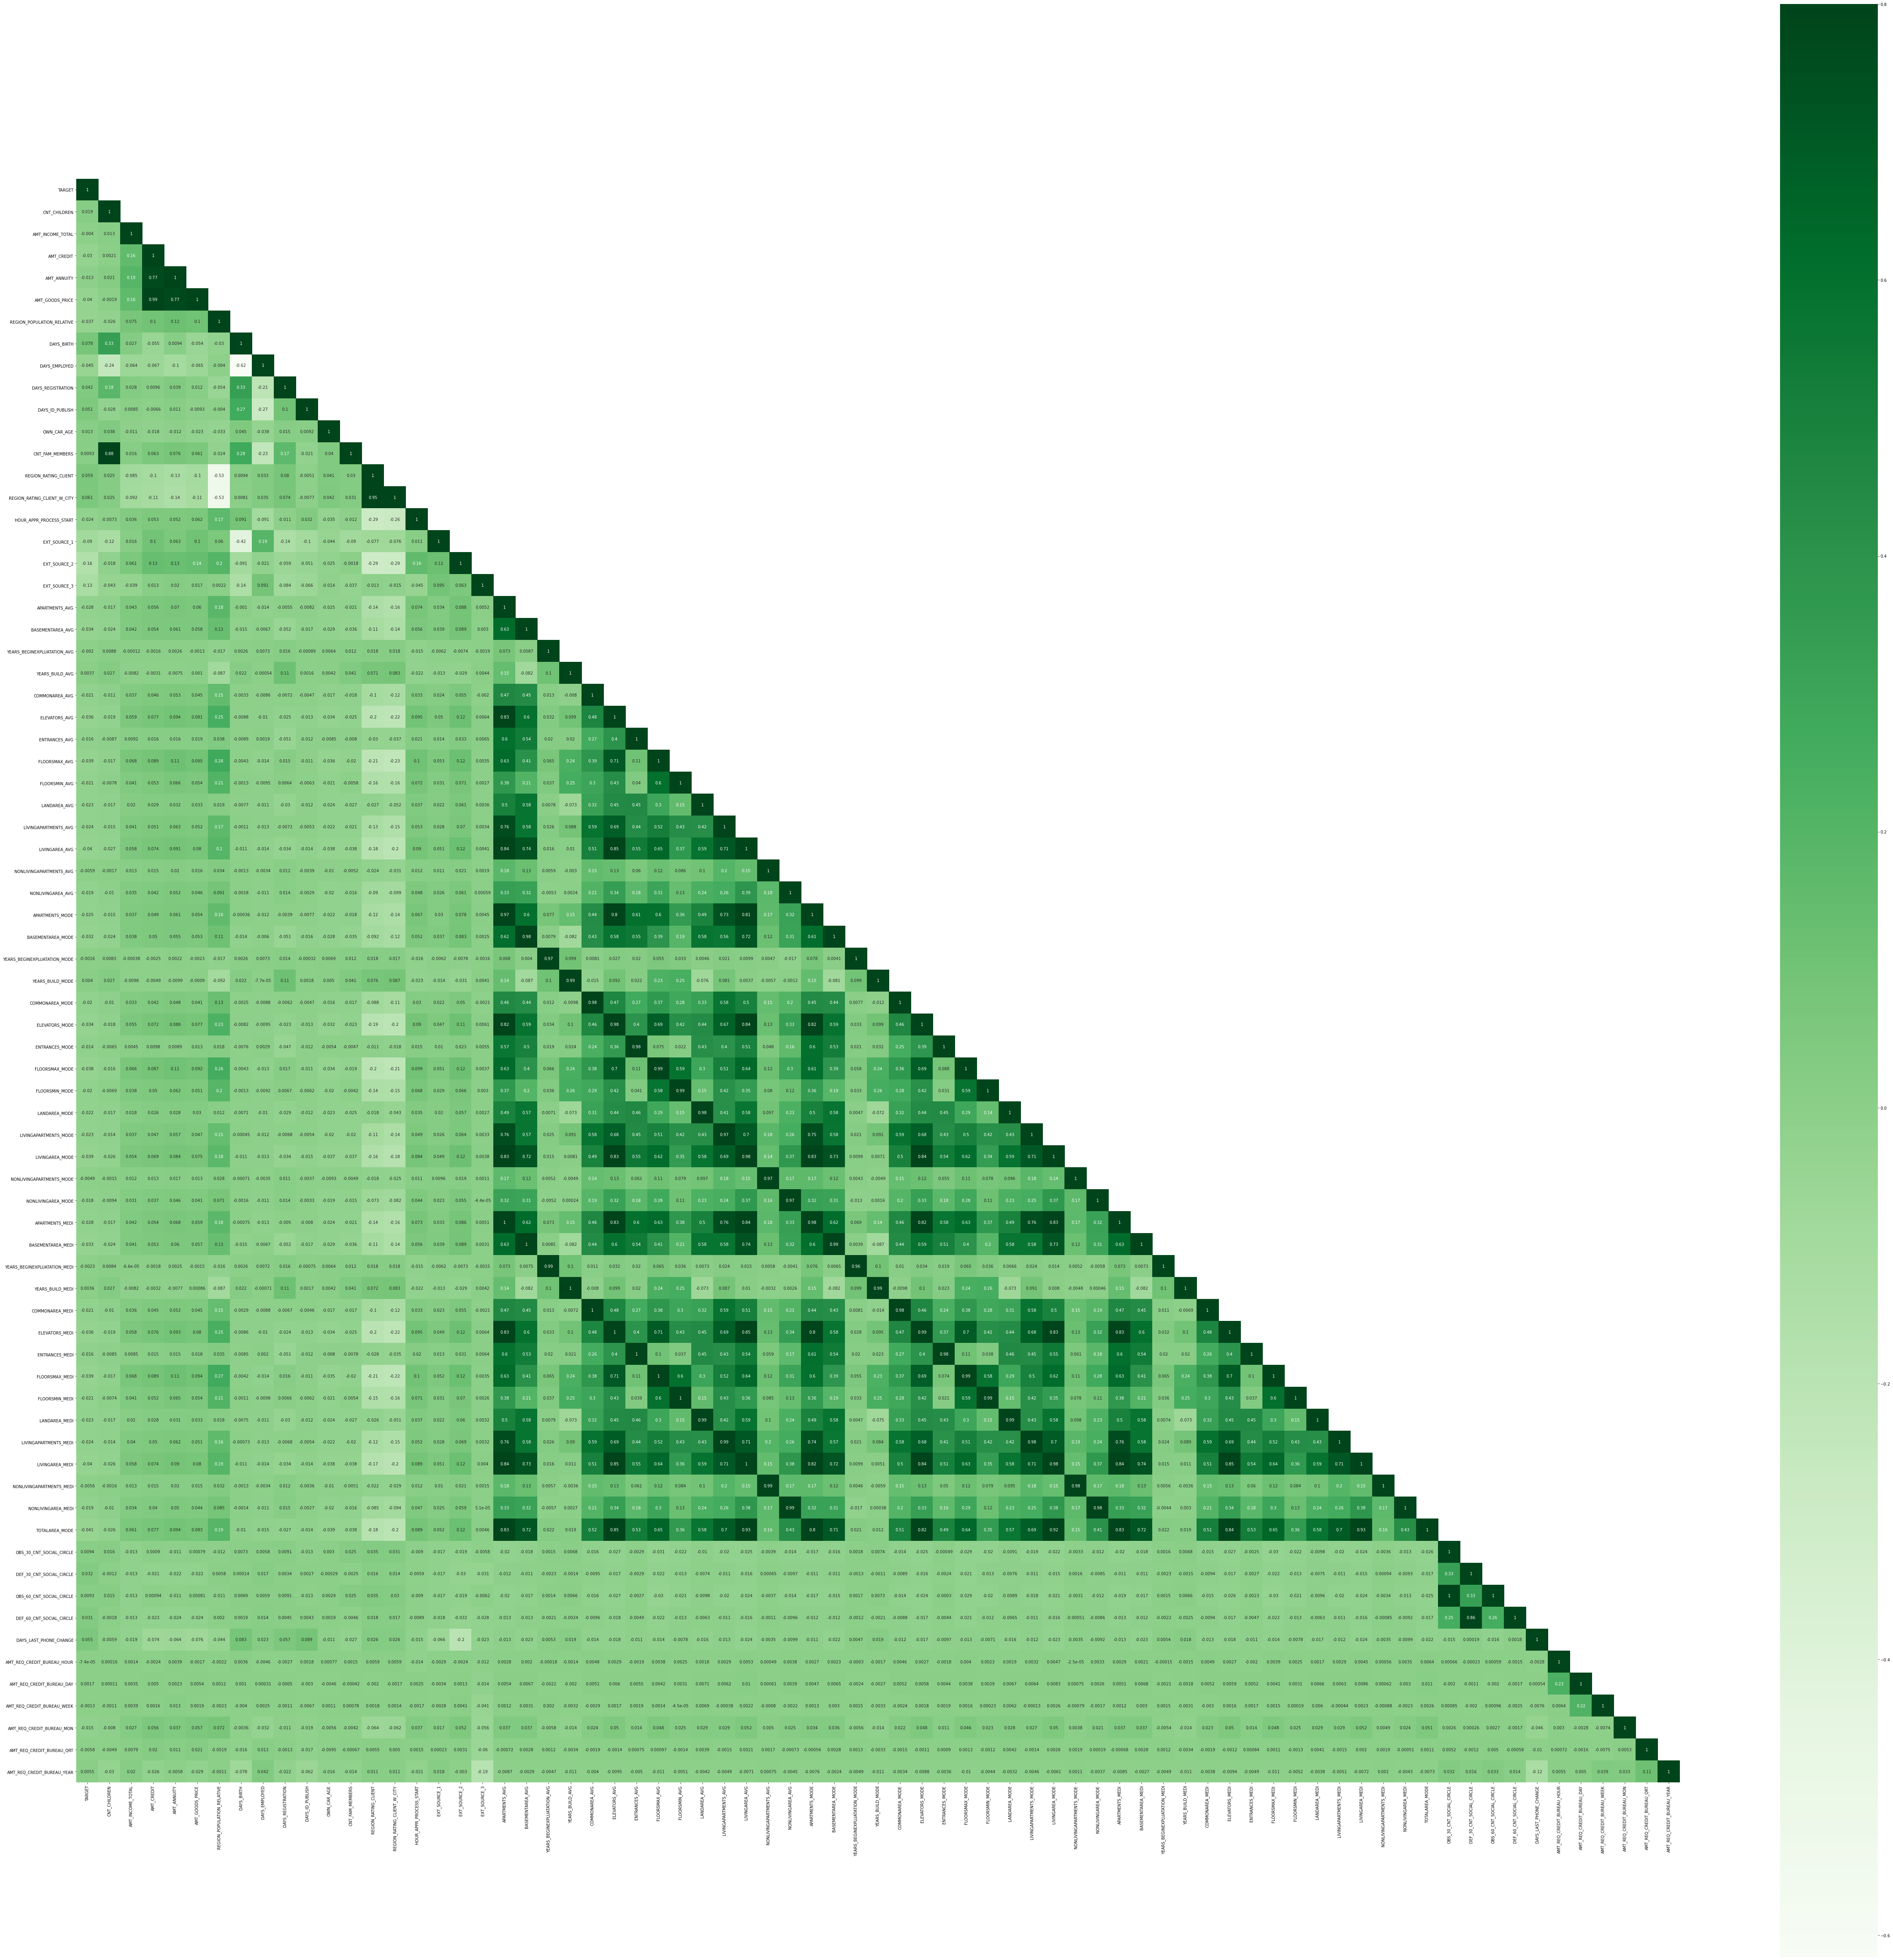

In [24]:
corrMatt = build_correlation_matrix(df_train_numerical)

**Function that deletes highly correlated features**

In [25]:
def delete_high_corr(df, corrMatt):
    high_correlation_set = set()
    counter = 0
    df_columns = list(df)
    for i in range(len(corrMatt)):
        for j in range(i + 1, len(corrMatt)):
            if corrMatt[df_columns[i]][df_columns[j]] > 0.9:
                #print(df_train_numerical_columns[i], ' ', df_train_numerical_columns[j], ' correlation ',  corrMatt[df_train_numerical_columns[i]][df_train_numerical_columns[j]])
                high_correlation_set.add(df_columns[j])
                counter = counter + 1
    for feature in high_correlation_set:
        df.drop(feature, axis='columns', inplace=True)


In [26]:
delete_high_corr(df_train_numerical, corrMatt)

In [27]:
df_train_numerical.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0       1             0          202500.0    406597.5      24700.5   
1       0             0          270000.0   1293502.5      35698.5   
2       0             0           67500.0    135000.0       6750.0   
3       0             0          135000.0    312682.5      29686.5   
4       0             0          121500.0    513000.0      21865.5   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  ...  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0            -2120  ...                       2.0                       2.0   
1             -291  ...                       1.0                       0.0   
2            -2531  ...                       0.0                       0.0   
3            -2437  ...                       2.0                       0.0   
4            -3458  ...                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                 -1134.0   
1                       0.0                  -828.0   
2                       0.0                  -815.0   
3                       0.0                  -617.0   
4                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 41 columns]

In [28]:
train_features = df_train_numerical.copy()
train_features.drop('TARGET', axis='columns', inplace=True)
train_features.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          202500.0    406597.5      24700.5   
1             0          270000.0   1293502.5      35698.5   
2             0           67500.0    135000.0       6750.0   
3             0          135000.0    312682.5      29686.5   
4             0          121500.0    513000.0      21865.5   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  OBS_30_CNT_SOCIAL_CIRCLE  \
0            -2120          7.0  ...                       2.0   
1             -291          7.0  ...                       1.0   
2            -2531         26.0  ...                       0.0   
3            -2437          7.0  ...                       2.0   
4            -3458          7.0  ...                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       0.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       0.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 40 columns]

In [29]:
train_x, test_x, train_y, test_y = train_test_split(train_features, df_train["TARGET"], test_size=0.2)
print(f"Train: {train_x.shape}, {train_y.shape}")
print(f"Test: {test_x.shape}, {test_y.shape}")

Train: (246008, 40), (246008,)
Test: (61503, 40), (61503,)


**Scaling, transforming and then learning linear regression on only numerical features**

In [30]:
def scale_and_transform(x_train, x_test):
    sc = StandardScaler()
    scaled_x_train = sc.fit_transform(x_train)
    scaled_x_test = sc.fit_transform(x_test)
    return scaled_x_train, scaled_x_test

In [31]:
scaled_train_x, scaled_test_x = scale_and_transform(train_x, test_x)

In [32]:
df_train['TARGET'].value_counts()/df_train.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

**Train and test score with ROC AUC metric**

In [33]:
w = {0:100, 1:1000}
lg2 = LogisticRegression(random_state=5, class_weight=w)
lg2.fit(scaled_train_x, train_y)
predict_train_y = lg2.predict(scaled_train_x)
predict_test_y = lg2.predict(scaled_test_x)
print(f"Train ROC_AUC Accuracy : {roc_auc_score(train_y, predict_train_y)}")
print(f"Test ROC_AUC Accuracy : {roc_auc_score(test_y, predict_test_y)}")

Train ROC_AUC Accuracy : 0.6539083062689135
Test ROC_AUC Accuracy : 0.6523088452521015


**Oversampling and using logistic regression without weights**

In [34]:
oversample = SMOTE()
X, y = oversample.fit_resample(scaled_train_x, train_y)

In [35]:
lg = LogisticRegression(random_state=5)
lg.fit(X, y)
predict_train_y = lg.predict(scaled_train_x)
predict_test_y = lg.predict(scaled_test_x)
print(f"Train ROC_AUC Accuracy : {roc_auc_score(train_y, predict_train_y)}")
print(f"Test ROC_AUC Accuracy : {roc_auc_score(test_y, predict_test_y)}")

Train ROC_AUC Accuracy : 0.6538372605063517
Test ROC_AUC Accuracy : 0.6508946553635749


In [36]:
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [37]:
numerical_features = numerical_features.drop('TARGET')

**Making our predictions with our model on test data**

In [38]:
df_test_copy = df_test[list(train_features)].copy()

In [39]:
df_test_copy.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          135000.0    568800.0      20560.5   
1             0           99000.0    222768.0      17370.0   
2             0          202500.0    663264.0      69777.0   
3             2          315000.0   1575000.0      49018.5   
4             1          180000.0    625500.0      32067.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018850      -19241          -2329            -5170.0   
1                    0.035792      -18064          -4469            -9118.0   
2                    0.019101      -20038          -4458            -2175.0   
3                    0.026392      -13976          -1866            -2000.0   
4                    0.010032      -13040          -2191            -4000.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  OBS_30_CNT_SOCIAL_CIRCLE  \
0             -812          NaN  ...                       0.0   
1            -1623          NaN  ...                       0.0   
2            -3503          5.0  ...                       0.0   
3            -4208          NaN  ...                       0.0   
4            -4262         16.0  ...                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       0.0                       0.0                 -1740.0   
1                       0.0                       0.0                     0.0   
2                       0.0                       0.0                  -856.0   
3                       0.0                       0.0                 -1805.0   
4                       0.0                       0.0                  -821.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 40 columns]

In [40]:
fill_with_mode(df_test_copy)

In [41]:
scaled_final_x = StandardScaler().fit_transform(df_test_copy)

In [42]:
Results = lg.predict(scaled_final_x)

In [43]:
my_submission = pd.DataFrame({'SK_ID_CURR' : df_test.SK_ID_CURR, 'TARGET' : Results})

In [44]:
my_submission.head()

SK_ID_CURR  TARGET
0      100001       0
1      100005       1
2      100013       0
3      100028       0
4      100038       1

**Our submission using a model learned only on numerical features**

In [45]:
my_submission.to_csv('submission.csv', index = False)

**Working with categorical features, finding correlation matrix**

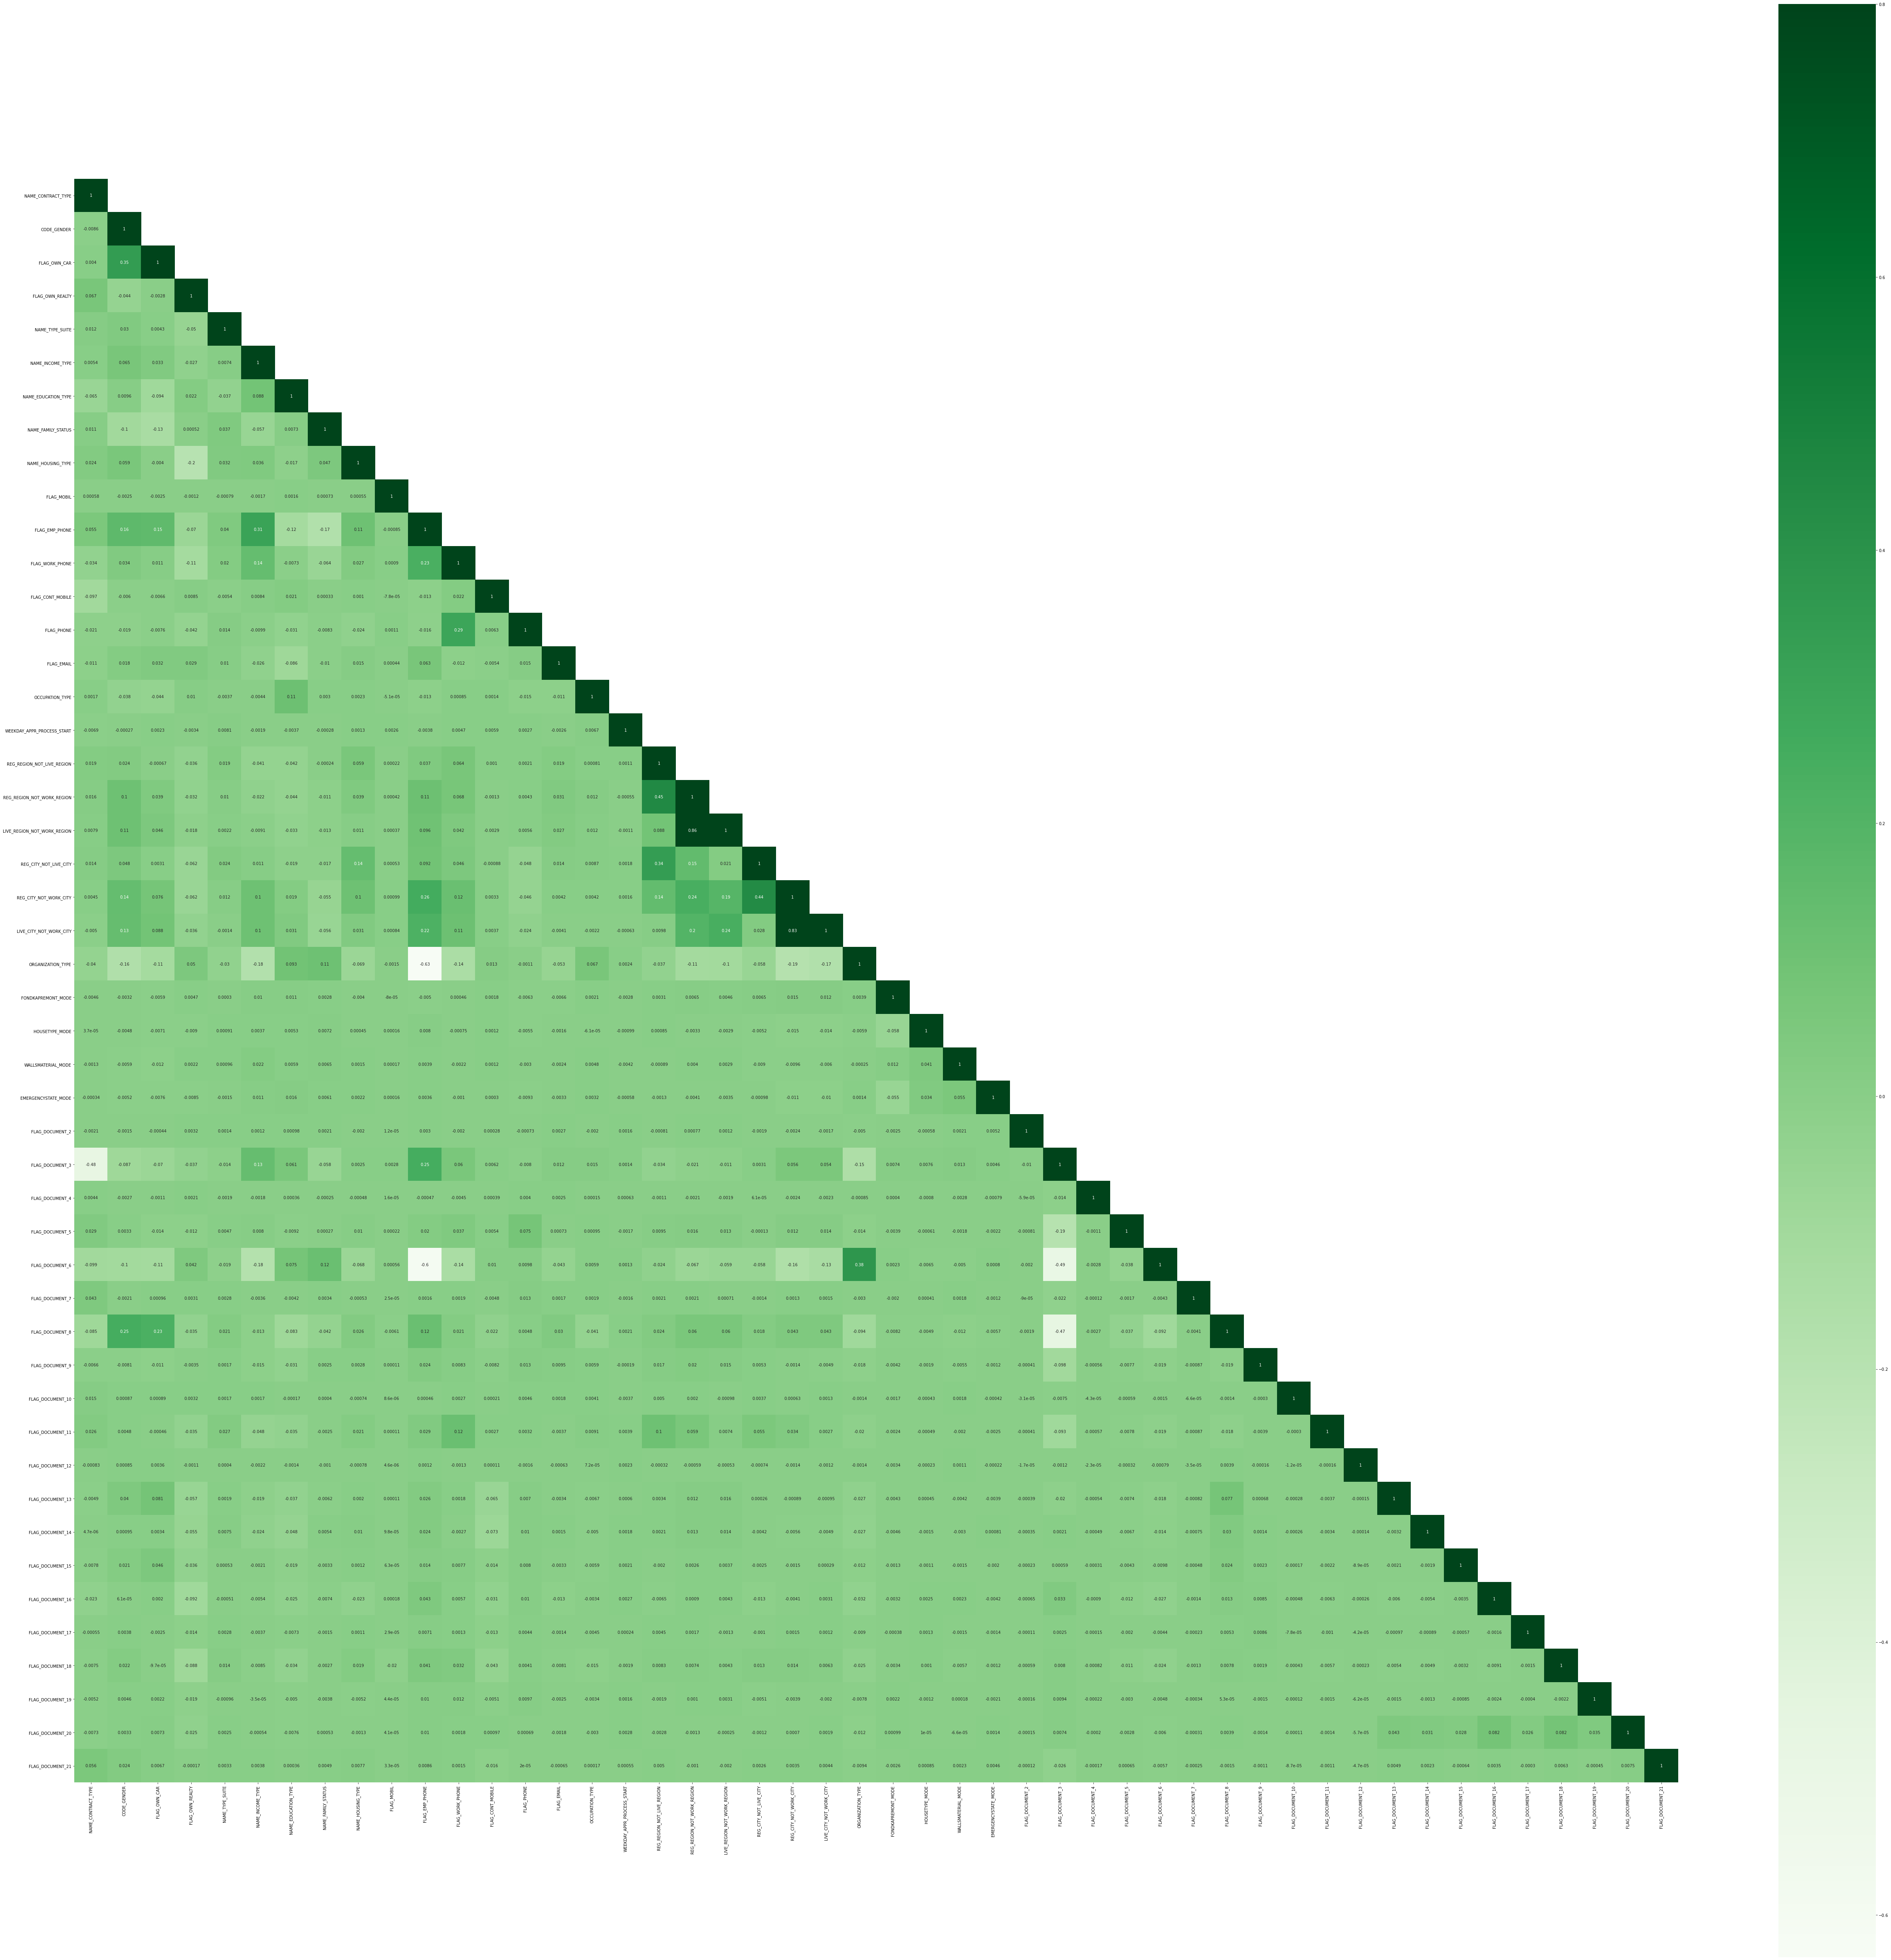

In [46]:
corrMatt_categorical = build_correlation_matrix(cat_df_train_replace)

In [47]:
cat_df_train_replace.isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
WEEKDAY_APPR_PROCESS_START     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
FONDKAPREMONT_MODE             0
HOUSETYPE_MODE                 0
WALLSMATERIAL_MODE             0
EMERGENCYSTATE_MODE            0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUM

**Concatination of numerical and categorical features and training logistic regression on them**

In [48]:
lg_common = LogisticRegression()

In [49]:
df_train_numerical.drop('TARGET',
  axis='columns', inplace=True)

In [50]:
df_train_numerical.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          202500.0    406597.5      24700.5   
1             0          270000.0   1293502.5      35698.5   
2             0           67500.0    135000.0       6750.0   
3             0          135000.0    312682.5      29686.5   
4             0          121500.0    513000.0      21865.5   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  OBS_30_CNT_SOCIAL_CIRCLE  \
0            -2120          7.0  ...                       2.0   
1             -291          7.0  ...                       1.0   
2            -2531         26.0  ...                       0.0   
3            -2437          7.0  ...                       2.0   
4            -3458          7.0  ...                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       0.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       0.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 40 columns]

In [51]:
df_train_numerical.reset_index(drop=True, inplace=True)
cat_df_train_replace.reset_index(drop=True, inplace=True)

In [52]:
df_common = pd.concat([df_train_numerical, cat_df_train_replace], axis=1)

In [53]:
df_common.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0             0          202500.0    406597.5      24700.5   
1             0          270000.0   1293502.5      35698.5   
2             0           67500.0    135000.0       6750.0   
3             0          135000.0    312682.5      29686.5   
4             0          121500.0    513000.0      21865.5   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0            -2120          7.0  ...                 1                 1   
1             -291          7.0  ...                 1                 1   
2            -2531         26.0  ...                 1                 1   
3            -2437          7.0  ...                 1                 1   
4            -3458          7.0  ...                 1                 1   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 1                 1                 1                 1   
1                 1                 1                 1                 1   
2                 1                 1                 1                 1   
3                 1                 1                 1                 1   
4                 1                 1                 1                 1   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 1                 1                 1                 1  
1                 1                 1                 1                 1  
2                 1                 1                 1                 1  
3                 1                 1                 1                 1  
4                 1                 1                 1                 1  

[5 rows x 88 columns]

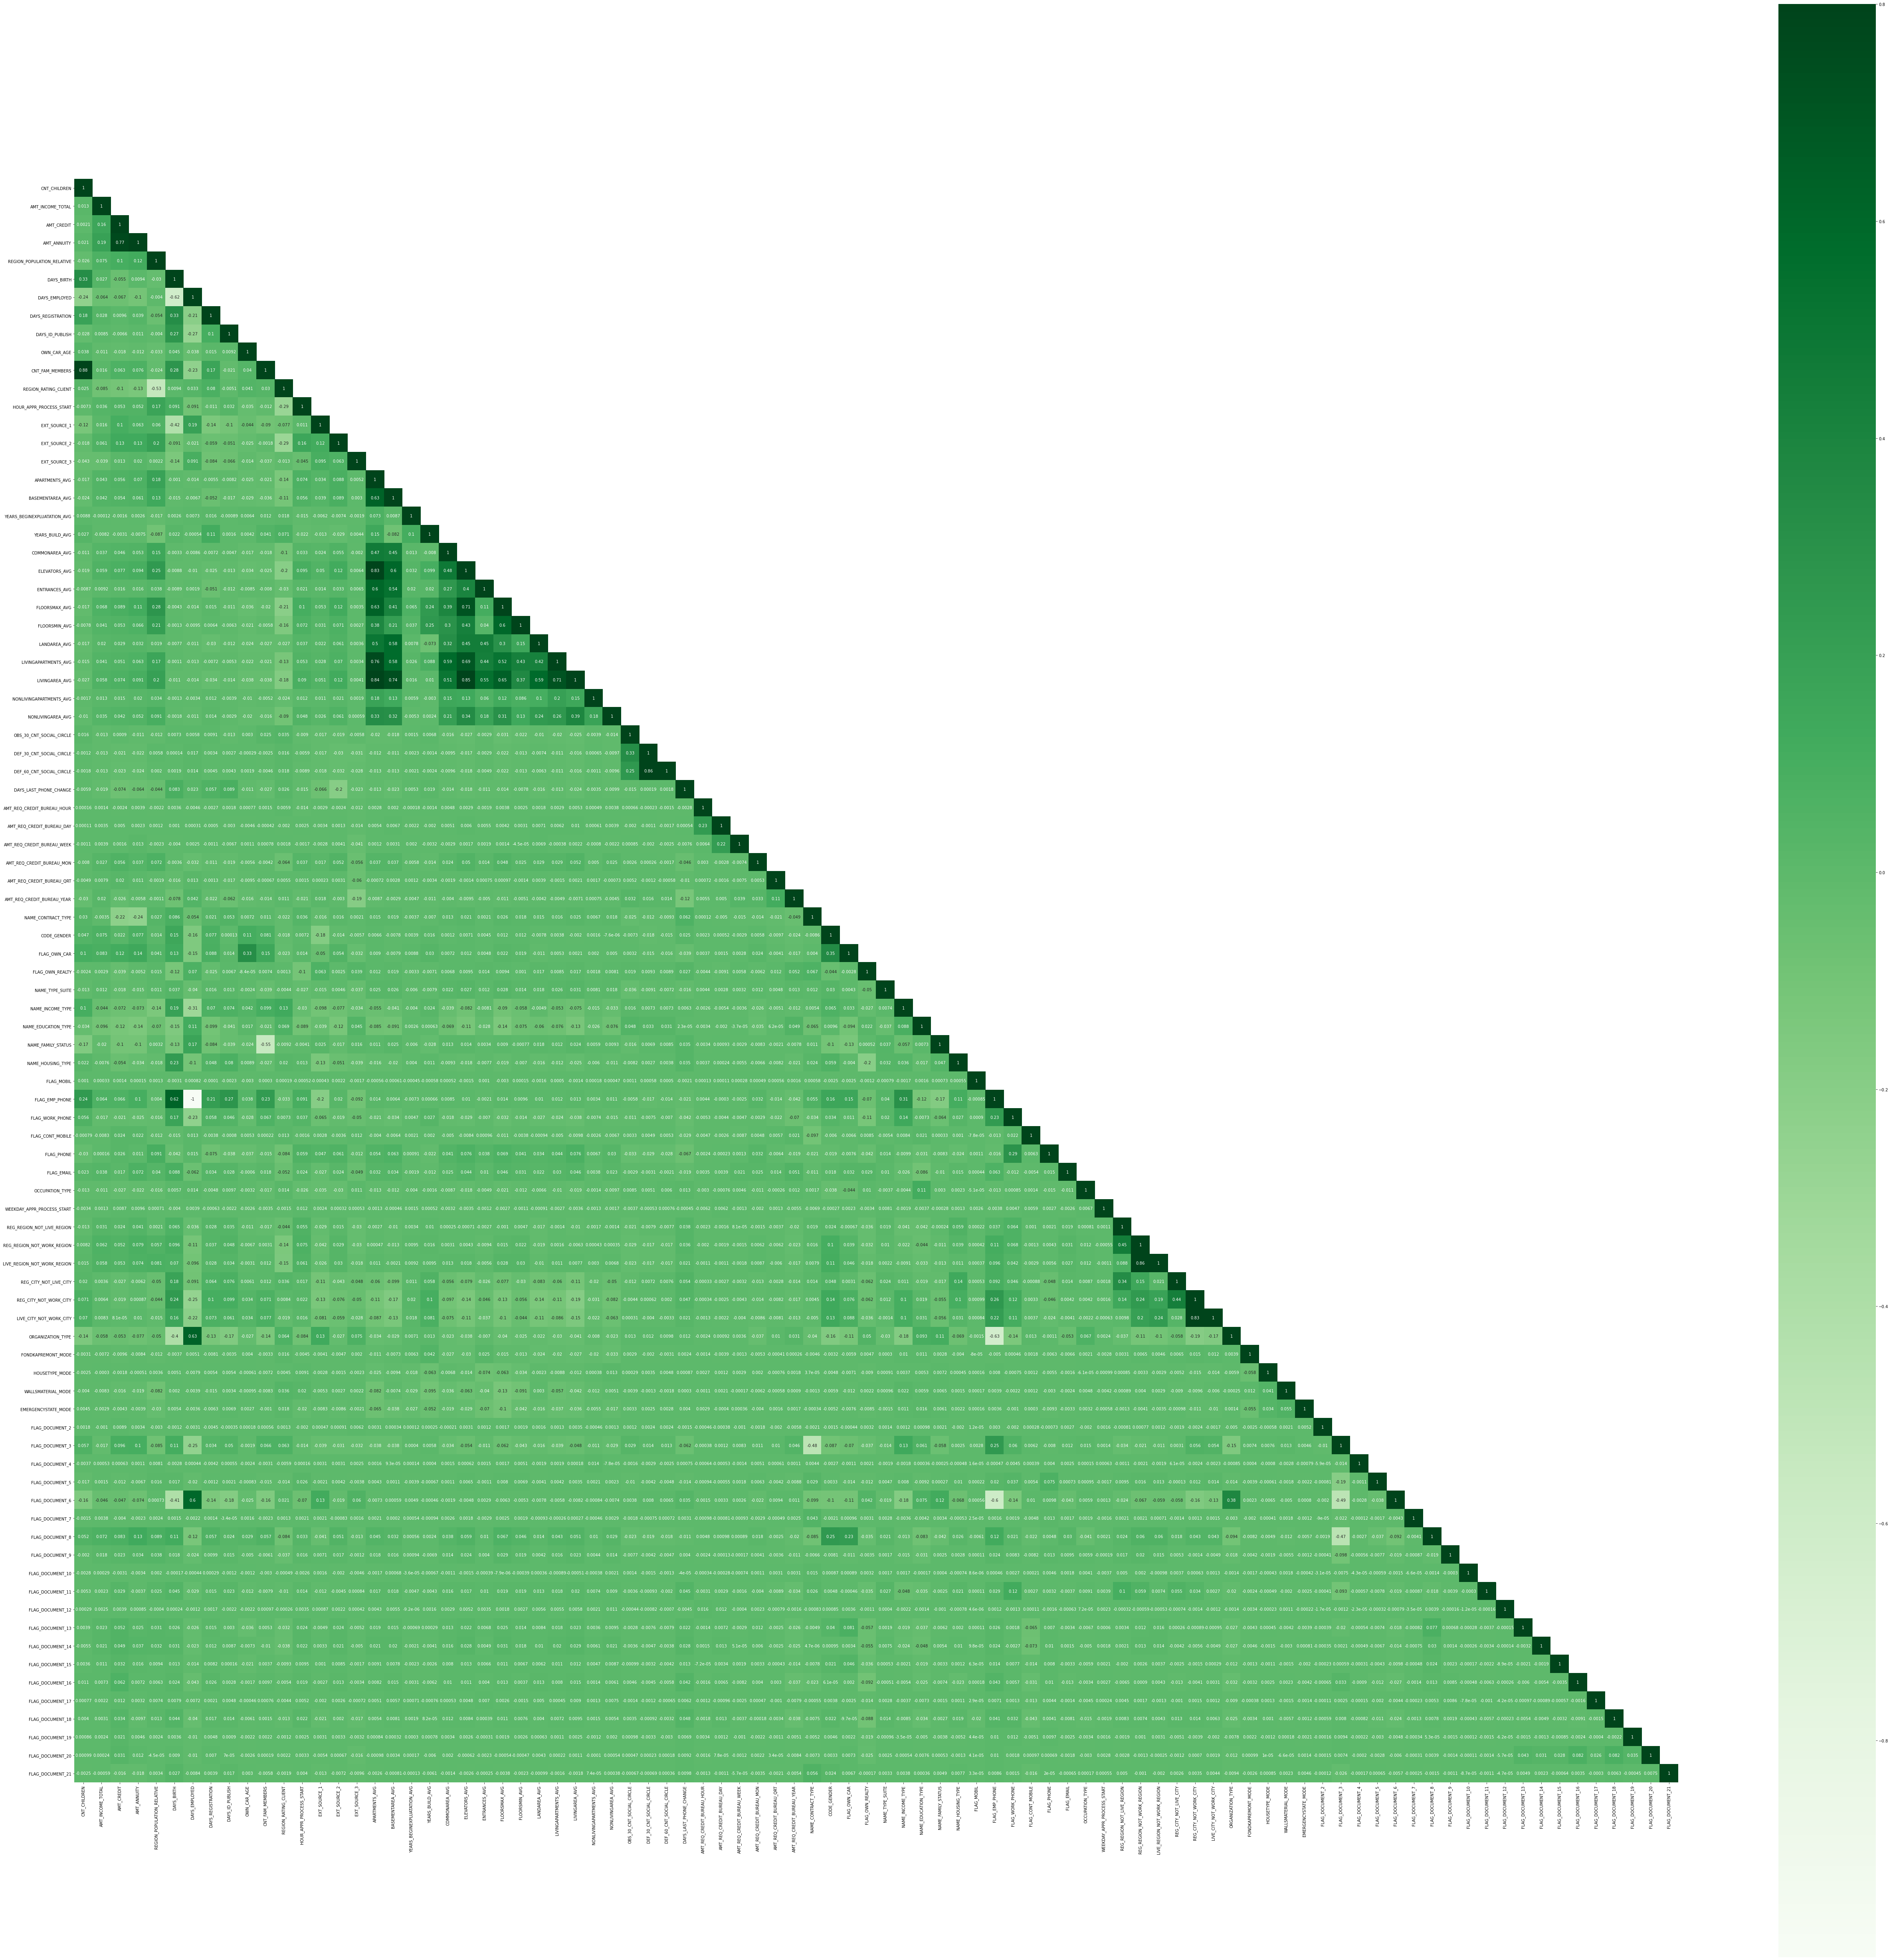

In [54]:
corrMatt_common = build_correlation_matrix(df_common)

In [55]:
train_common_x, test_comon_x, train_common_y, test_common_y = train_test_split(df_common, df_train["TARGET"], test_size=0.2)
scaled_train_common_x, scaled_test_common_x = scale_and_transform(train_common_x, test_comon_x)
X_common, Y_common = oversample.fit_resample(scaled_train_common_x, train_common_y)
lg_common = LogisticRegression()
lg_common.fit(X_common, Y_common)
train_preds_common = lg_common.predict_proba(scaled_train_common_x)
test_preds_common = lg_common.predict_proba(scaled_test_common_x)
train_preds_common = train_preds_common[:, 1]
test_preds_common = test_preds_common[: , 1]
print(f"Train ROC_AUC Accuracy : {roc_auc_score(train_common_y, train_preds_common)}")
print(f"Test ROC_AUC Accuracy : {roc_auc_score(test_common_y, test_preds_common)}")

Train ROC_AUC Accuracy : 0.7251040031397911
Test ROC_AUC Accuracy : 0.7252041334198893


**Making our predictions on test data**

In [56]:
df_common_test = df_test[list(df_common)].copy()

In [57]:
df_common_test.isnull().sum()

CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                   24
REGION_POPULATION_RELATIVE     0
                              ..
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_21               0
Length: 88, dtype: int64

In [58]:
fill_with_mode(df_common_test)

In [59]:
df_common_test.isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
REGION_POPULATION_RELATIVE    0
                             ..
FLAG_DOCUMENT_17              0
FLAG_DOCUMENT_18              0
FLAG_DOCUMENT_19              0
FLAG_DOCUMENT_20              0
FLAG_DOCUMENT_21              0
Length: 88, dtype: int64

In [60]:
df_common_test = label_encoding(df_common_test, flag_help = True, help_df = cat_df_train_replace)

In [61]:
X_f = StandardScaler().fit_transform(df_common_test)
last_result = lg_common.predict_proba(X_f)
last_result = last_result[: , 1]
my_submission = pd.DataFrame({'SK_ID_CURR' : df_test.SK_ID_CURR, 'TARGET' : last_result})
my_submission.to_csv('submission_2.csv', index = False)